# Convolutional Neural Network to Classify Images from MNIST Database

### 1. Load MNIST database

MNIST is one of the most famous datasets in the field of machine learning
 - It has 70,000 images of hand-written digits
 - Very straight forward to download
 - Images dimensions are 28x28
 - Grayscale images

In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

2024-05-18 21:59:21.146939: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-18 21:59:21.148517: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-18 21:59:21.191196: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-18 21:59:21.380192: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-18 21:59:22.418437: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

- x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.
- y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.
- x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.
- y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

In [4]:
print('x_train type:',type(x_train),', x_train shape:',x_train.shape)
print('y_train type:',type(y_train),', y_train shape:',y_train.shape)
print('x_test type:',type(x_test),', x_test shape:',x_test.shape)
print('y_test type:',type(y_test),', y_test shape:',y_test.shape)

x_train type: <class 'numpy.ndarray'> , x_train shape: (60000, 28, 28)
y_train type: <class 'numpy.ndarray'> , y_train shape: (60000,)
x_test type: <class 'numpy.ndarray'> , x_test shape: (10000, 28, 28)
y_test type: <class 'numpy.ndarray'> , y_test shape: (10000,)


### 2. Visualize the first training images

/home/angelo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


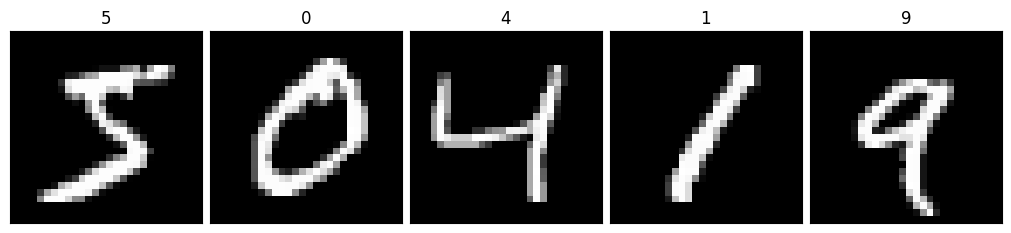

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,5,layout='constrained',figsize=(10,4))
for _ in range(5):
    axs[_].set_title(str(y_train[_]))
    axs[_].imshow(x_train[_],cmap='gray')

for _ in axs:
    _.tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)
    
plt.show()

### 3. Detailed image

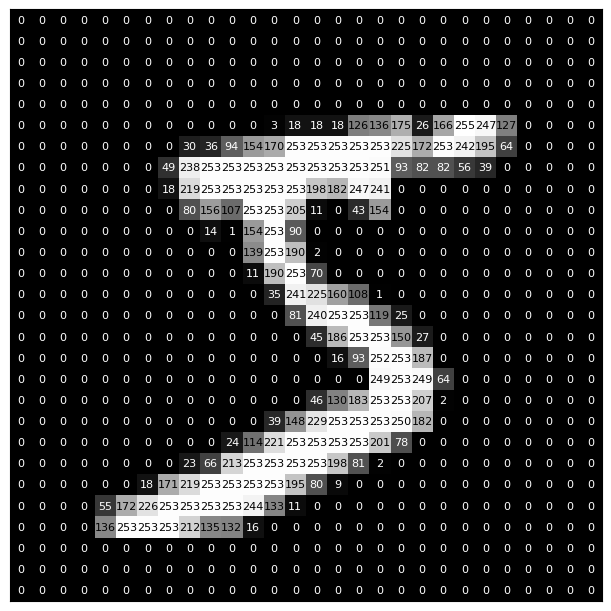

In [3]:
def pixels_intensities(img, ax):
    ax.imshow(img, cmap='gray')
    N, M = img.shape
    thresh = 100#img.max()/2.5
    for i in range(N):
        for j in range(M):
            ax.annotate(text=str(round(img[i,j],2)),
                        fontsize=8, xy=(j,i),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[i,j]<thresh else 'black')

fig, ax = plt.subplots(1,1,layout='constrained',figsize=(10,6))
ax.tick_params(left=[],bottom=[],labelleft=[],labelbottom=[])
pixels_intensities(x_train[0], ax)

### 4. Images preprocessing (rescale and reshape)

- A cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales.

In [4]:
x_train = x_train/255.0
x_test = x_test/255.0

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

### 5. Labels preprocessing (one-hot encoding)

In [5]:
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

### 6. Split the dataset for training and validation

In [6]:
x_train, x_valid = x_train[:50000], x_train[50000:]
y_train, y_valid = y_train[:50000], y_train[50000:]

print(f"train samples: {x_train.shape[0]}")
print(f"test samples: {x_test.shape[0]}")
print(f"validation samples: {x_valid.shape[0]}")

train samples: 50000
test samples: 10000
validation samples: 10000


### 7. Model architecture

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dropout, Dense

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(rate=0.3))
model.add(Dense(64, activation='relu'))

model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

/home/angelo/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

### 8. Compile the model

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### 9. Train the model

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='best_weights/mnist_cnn.model.weights.best.keras', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=12, validation_data=(x_valid, y_valid),
                 callbacks=[checkpointer], verbose=2, shuffle=True)

Epoch 1/12

Epoch 1: val_loss improved from inf to 0.06468, saving model to mnist_cnn.model.weights.best.keras
1563/1563 - 16s - 10ms/step - accuracy: 0.9085 - loss: 0.2966 - val_accuracy: 0.9814 - val_loss: 0.0647
Epoch 2/12

Epoch 2: val_loss improved from 0.06468 to 0.05624, saving model to mnist_cnn.model.weights.best.keras
1563/1563 - 15s - 10ms/step - accuracy: 0.9645 - loss: 0.1258 - val_accuracy: 0.9829 - val_loss: 0.0562
Epoch 3/12

Epoch 3: val_loss improved from 0.05624 to 0.04409, saving model to mnist_cnn.model.weights.best.keras
1563/1563 - 16s - 10ms/step - accuracy: 0.9722 - loss: 0.1021 - val_accuracy: 0.9882 - val_loss: 0.0441
Epoch 4/12

Epoch 4: val_loss improved from 0.04409 to 0.03928, saving model to mnist_cnn.model.weights.best.keras
1563/1563 - 16s - 11ms/step - accuracy: 0.9734 - loss: 0.0972 - val_accuracy: 0.9889 - val_loss: 0.0393
Epoch 5/12

Epoch 5: val_loss did not improve from 0.03928
1563/1563 - 14s - 9ms/step - accuracy: 0.9725 - loss: 0.1014 - val_ac

### 10. Load trained weights

In [10]:
model.load_weights('best_weights/mnist_cnn.model.weights.best.keras')

### 11. Calculate the classification accuracy on the test set

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
loss, accuracy = score[0], score[1]

#model.metrics_names
print(f"loss = {round(100*loss,2)}%, accuracy = {round(100*accuracy,2)}%")

loss = 3.76%, accuracy = 98.74%


### 12. Visualize some predictions

In [15]:
y_hat = model.predict(x_test)

mnist_labels = ["0","1","2","3","4","5","6","7","8","9"]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


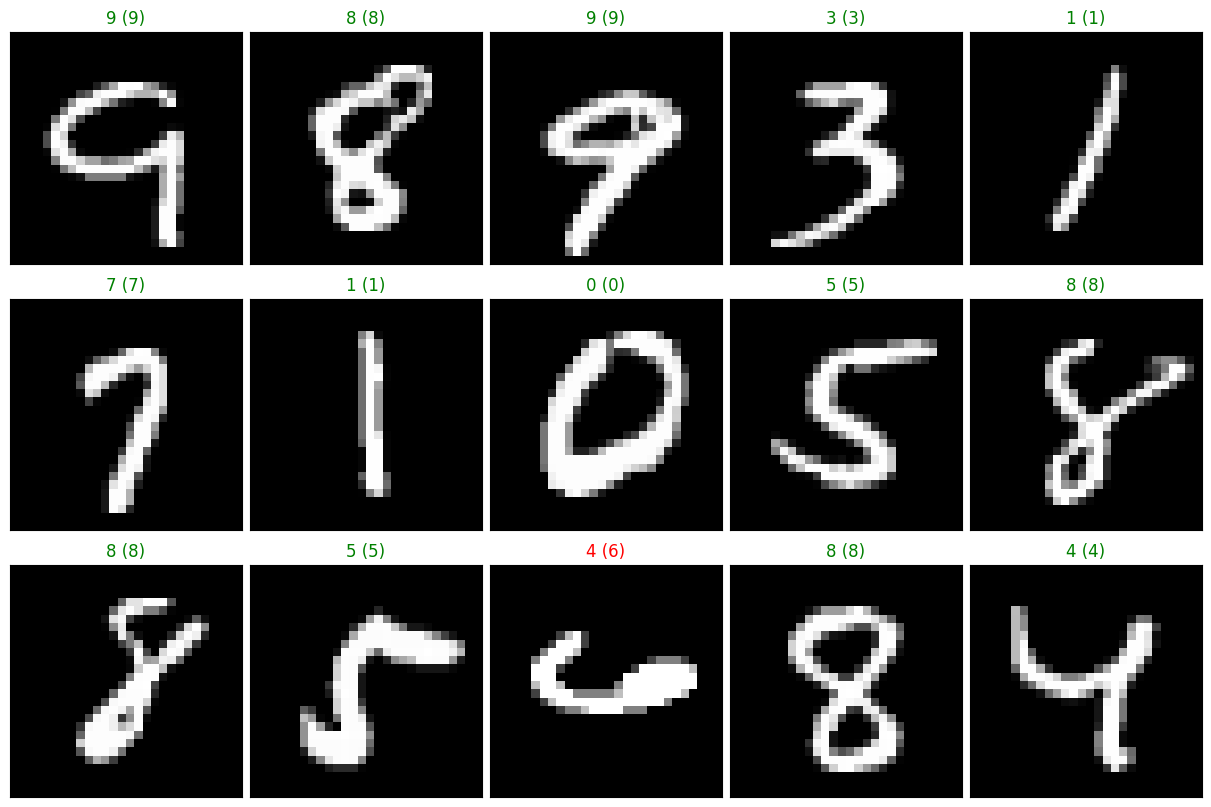

In [18]:
fig, axs = plt.subplots(3,5,layout='constrained',figsize=(12,8))
for i,j in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    axs.flat[i].imshow(x_test[j], cmap='gray')
    axs.flat[i].tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)
    pred_idx = np.argmax(y_hat[j])
    true_idx = np.argmax(y_test[j])
    axs.flat[i].set_title("{0} ({1})".format(mnist_labels[pred_idx], mnist_labels[true_idx]),
                          color='green' if pred_idx == true_idx else 'red')